https://sspai.com/post/55655

在地理空间数据分析中，常会用到许多地理分析的工具，下面针对常用的shapely、geopandas、folium、kepler.gl、geohash等工具进行简单介绍。其中shapely和geopandas是做地理空间数据的分析很好的工具，而folium和kepler.gl是进行地理数据可视化的工具，geohash是将经纬度坐标进行数据编码的方式。

# [shapely](https://shapely.readthedocs.io/en/stable/project.html)

[参考资料](https://mp.weixin.qq.com/s/DvTxxRGpA2JF9OdGdsYphw)  
[官方资料](https://shapely.readthedocs.io/en/stable/project.html)

Shapely是python中开源的空间几何对象库，支持Point、Curve和Surface等基本几何对象类型以及相关空间操作。另外，几何对象类型的特征分别有interior、boundary和exterior。

#### 空间数据模型  
1.point类型对应的方法在Point类中。curve类型对应的方法在LineString和LinearRing类中。surface类型对应的方法在Polygon类中。
2.point集合对应的方法在MultiPoint类中，curves集合对应的反方在MultiLineString类中，surface集合对应的方法在MultiPolygon类中。

#### 几何对象的一些功能特性
Point、LineString和LinearRing有一些功能非常有用。
- 几何对象可以和numpy.array互相转换。

- 可以求线的长度(length)，面的面积（area)，对象之间的距离(distance),最小最大距离(hausdorff_distance),对象的bounds数组(minx, miny, maxx, maxy)

- 可以求几何对象之间的关系：相交(intersect)，包含(contain)，求相交区域(intersection)等。

- 可以对几何对象求几何中心(centroid),缓冲区(buffer),最小旋转外接矩形(minimum_rotated_rectangle)等。

- 可以求线的插值点(interpolate),可以求点投影到线的距离(project),可以求几何对象之间对应的最近点(nearestPoint)

- 可以对几何对象进行旋转(rotate)和缩放(scale)

In [226]:
from shapely import geometry as geo
from shapely import wkt 
from shapely import ops
import numpy as np 

#### Point 
class Point(coordinates)

In [64]:
# point有三种赋值方式，具体如下
point = geo.Point(0.5,0.5)  
point_2 = geo.Point((0,0))  
point_3 = geo.Point(point)
# 其坐标可以通过coords或x，y，z得到
print(list(point_3.coords))
print(point_3.x)
print(point_3.y)
#批量进行可视化
geo.GeometryCollection([point,point_2])
print(np.array(point))#可以和np.array进行互相转换

[(0.5, 0.5)]
0.5
0.5
[0.5 0.5]


#### LineStrings  
class LineString(coordinates)  
LineStrings构造函数传入参数是2个或多个点元组

两个几何对象之间的距离:1.4142135623730951
两个几何对象之间的hausdorff_distance距离:2.8284271247461903
该几何对象的面积:0.0
该几何对象的坐标范围:(0.0, 0.0, 1.0, 1.0)
该几何对象的长度:2.414213562373095
该几何对象的几何类型:LineString
该几何对象的坐标系:[(0.0, 0.0), (1.0, 1.0), (1.0, 0.0)]


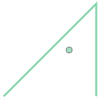

In [21]:
#代码示例
arr=np.array([(0,0), (1,1), (1,0)])
line = geo.LineString(arr) #等同于 line = geo.LineString([(0,0), (1,1), (1,0)]) 

print ('两个几何对象之间的距离:'+str(geo.Point(2,2).distance(line)))#该方法即可求线线距离也可以求线点距离
print ('两个几何对象之间的hausdorff_distance距离:'+str(geo.Point(2,2).hausdorff_distance(line)))#该方法求得是点与线的最长距离
print('该几何对象的面积:'+str(line.area))
print('该几何对象的坐标范围:'+str(line.bounds))
print('该几何对象的长度:'+str(line.length))
print('该几何对象的几何类型:'+str(line.geom_type))  
print('该几何对象的坐标系:'+str(list(line.coords)))
center = line.centroid #几何中心
geo.GeometryCollection([line,center])

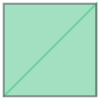

In [19]:
bbox = line.envelope #envelope可以求几何对象的最小外接矩形
geo.GeometryCollection([line,bbox]) 

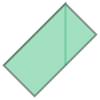

In [20]:
rect = line.minimum_rotated_rectangle #最小旋转外接矩形
geo.GeometryCollection([line,rect])

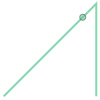

In [22]:
pt_half = line.interpolate(0.5,normalized=True) #插值
geo.GeometryCollection([line,pt_half])

In [ ]:
ratio = line.project(pt_half,normalized=True) # project()方法是和interpolate方法互逆的
print(ratio)

下面这个是DouglasPucker算法的应用，在轨迹分析中经常会用得到

LINESTRING (0 0, 1 -0.2, 2 0.3, 3 -0.5, 5 0.2, 7 0)
LINESTRING (0 0, 2 0.3, 3 -0.5, 5 0.2, 7 0)


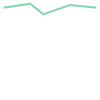

In [76]:
line1 = geo.LineString([(0,0),(1,-0.2),(2,0.3),(3,-0.5),(5,0.2),(7,0)])
line1_simplify = line1.simplify(0.4, preserve_topology=False)  #Douglas-Pucker算法
print(line1)
print(line1_simplify)
line1_simplify

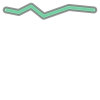

In [61]:
buffer_with_circle = line1.buffer(0.2)  #端点按照半圆扩展
geo.GeometryCollection([line1,buffer_with_circle])

#### LinearRings

class LinearRing(coordinates)
LineStrings构造函数传入参数是2个或多个点元组

元组序列可以通过在第一个和最后一个索引中传递相同的值来显式关闭。否则，将第一个元组复制到最后一个索引，从而隐式关闭序列。
与LineString一样，元组序列中的重复点是允许的，但可能会导致性能上的损失，应该避免在序列中设置重复点。

3.414213562373095
0.0


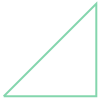

In [62]:
# from shapely.geometry.polygon import LinearRing
ring = geo.polygon.LinearRing([(0, 0), (1, 1), (1, 0)])
print(ring.length)#相比于刚才的LineString的代码示例，其长度现在是3.41，是因为其序列是闭合的
print(ring.area)
geo.GeometryCollection([ring])

#### Polygon  
class Polygon(shell[, holes=None])  
Polygon接受两个位置参数，第一个位置参数是和LinearRing一样，是一个有序的point元组。第二个位置参数是可选的序列，其用来指定内部的边界

0.5
3.414213562373095
3.5
10.82842712474619
[[0. 0.]
 [0. 2.]
 [2. 2.]
 [2. 0.]
 [0. 0.]]


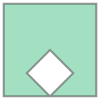

In [57]:
from shapely.geometry import Polygon
polygon1 = Polygon([(0, 0), (1, 1), (1, 0)])
ext = [(0, 0), (0, 2), (2, 2), (2, 0), (0, 0)]
int = [(1, 0), (0.5, 0.5), (1, 1), (1.5, 0.5), (1, 0)]
polygon2 = Polygon(ext, [int])
print(polygon1.area)
print(polygon1.length)
print(polygon2.area)#其面积是ext的面积减去int的面积
print(polygon2.length)#其长度是ext的长度加上int的长度
print(np.array(polygon2.exterior))  #外围坐标点
geo.GeometryCollection([polygon2])

与之前介绍的类似，MultiPoint、MultiLineString、MultiPolygon分别指的是多个点、多个linestring和多个polygon形成的集合。
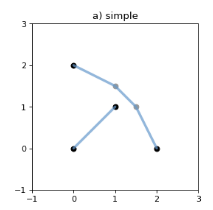    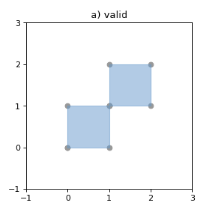

## 几何对象关系

一个几何对象特征分别有interior、boundary和exterior。下面的叙述直接用内部、边界和外部等名词概述

1.object.contains(other)  
如果object的外部没有其他点，或者至少有一个点在该object的内部，则返回True  
a.contains(b)与 b.within(a)的表达是等价的

True
False
True


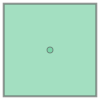

In [59]:
coords = [(0, 0), (1, 1)]
print(LineString(coords).contains(Point(0.5, 0.5)))#线与点的关系
print(LineString(coords).contains(Point(1.0, 1.0)))#因为line的边界不是属于在该对象的内部，所以返回是False
polygon1 = Polygon( [(0, 0), (0, 2), (2, 2), (2, 0), (0, 0)])
print(polygon1.contains(Point(1.0, 1.0)))#面与点的关系
#同理这个contains方法也可以扩展到面与线的关系以及面与面的关系
geo.GeometryCollection([polygon1,Point(1.0, 1.0)])

2.object.crosses(other)  
如果一个object与另一个object是内部相交的关系而不是包含的关系，则返回True  
3.object.disjoint(other)   
如果该对象与另一个对象的内部和边界都不相交则返回True  
4. object.intersects(other)  
如果该几何对象与另一个几何对象只要相交则返回True。  
5. object.convex_hull  
返回包含对象中所有点的最小凸多边形（凸包）

In [71]:
print( LineString(coords).crosses(LineString([(0, 1), (1, 0)])))
print(Point(0, 0).disjoint(Point(1, 1)))
print( LineString(coords).intersects(LineString([(0, 1), (1, 0)])))

True
True
True


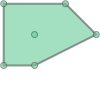

In [70]:
# 在下图中即为在给定6个point之后求其凸包，并绘制出来的凸包图形
points1 = geo.MultiPoint([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
hull1 = points1.convex_hull
geo.GeometryCollection([hull1,points1])

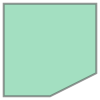

In [72]:
# object.intersection  返回对象与对象之间的交集
polygon1 = Polygon( [(0, 0), (0, 2), (2, 2), (2, 0), (0, 0)])
hull1.intersection(polygon1)

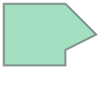

In [73]:
#返回对象与对象之间的并集
hull1.union(polygon1)

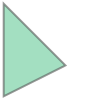

In [77]:
hull1.difference(polygon1) #面面补集

6.与numpy和python数组之间的关系  
point、LineRing和LineString提供numpy数组接口，可以进行转换numpy数组

In [79]:
from shapely.geometry import asPoint,asLineString,asMultiPoint,asPolygon
import numpy as np
pa = asPoint(np.array([0.0, 0.0]))#将numpy数组转换成point格式
la = asLineString(np.array([[1.0, 2.0], [3.0, 4.0]]))#将numpy数组转换成LineString格式
ma = asMultiPoint(np.array([[1.1, 2.2], [3.3, 4.4], [5.5, 6.6]]))#将numpy数组转换成multipoint集合
pg = asPolygon(np.array([[1.1, 2.2], [3.3, 4.4], [5.5, 6.6]]))#将numpy数组转换成polygon
print(np.array(pa))#将Point转换成numpy格式

[0. 0.]


另外还有一些非常有用但是不属于某个类方法的函数，如有需要可以在官网查阅
- ops.nearest_points 求最近点
- ops.split 分割线
- ops.substring  求子串
- affinity.rotate 旋转几何体
- affinity.scale 缩放几何体
- affinity.translate 平移几何体

# [geopandas](https://geopandas.org/)

GeoPandas提供了地理空间数据的高级接口，它让使用python处理地理空间数据变得更容易。GeoPandas扩展了[pandas](GeoPandas的目标是使使用python处理地理空间数据更容易。它结合了熊猫和shape的功能，提供了熊猫的地理空间操作和shape的多个几何图形的高级接口。GeoPandas使您能够轻松地在python中进行操作，否则将需要空间数据库(如PostGIS)。)使用的数据类型，允许对几何类型进行空间操作。几何运算由[shapely](https://shapely.readthedocs.io/en/stable/)执行。Geopandas进一步依赖[fiona](https://fiona.readthedocs.io/en/latest/)进行文件访问，依赖[matplotlib](http://matplotlib.org/)进行绘图。

geopandas和pandas一样，一共有两种数据类型：
- GeoSeries
- GeoDataFrame
它们继承了pandas数据结构的大部分方法。这两个数据结构可以当做地理空间数据的存储器，shapefile文件的pandas呈现。  

Shapefile文件用于描述几何体对象：点，折线与多边形。例如，Shapefile文件可以存储井、河流、湖泊等空间对象的几何位置。除了几何位置，shp文件也可以存储这些空间对象的属性，例如一条河流的名字，一个城市的温度等等。

例如，当安装geopandas库后，便可通过matplotlib直接画出当安装geopandas数据集中的世界地图

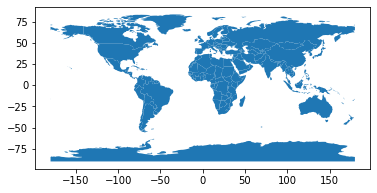

In [105]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))#read_file方法可以读取shape文件，转化为GeoSeries和GeoDataFrame数据类型。
world.plot()#将GeoDataFrame变成图形展示出来，得到世界地图
plt.show()

In [102]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


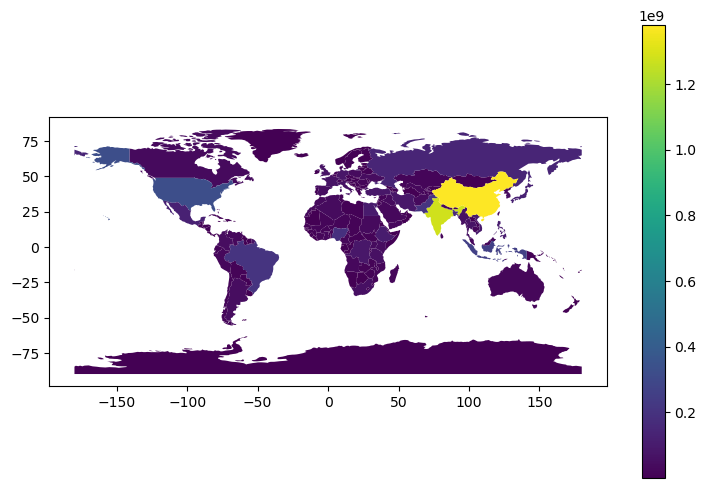

In [107]:
#根据每一个polygon的pop_est不同，便可以用python绘制图表显示不同国家的人数
fig, ax = plt.subplots(figsize=(9,6),dpi = 100)
world.plot('pop_est',ax = ax,legend = True)
plt.show()

由以上geodataframe的实例world可知，其最后一列是geometry。其几何对象包括了MULTIPOLYGON 、POLYGON，那么便同样可以用刚才介绍的shapely库进行分析。  

具体的geopadandas常用的方法可以参考[这篇文章](https://www.cnblogs.com/giserliu/p/4988615.html
)  

geopdandas的相关中文案例和分析可参考这个[集锦](https://mp.weixin.qq.com/mp/appmsgalbum?action=getalbum&__biz=MzA3ODYwNDkzOQ==&scene=1&album_id=1342860388945444864&count=3#wechat_redirect)，了解一下具体使用情况

# Folium
[官方文档](https://python-visualization.github.io/folium/index.html)

folium可以满足我们平时常用的热力图、填充地图、路径图、散点标记等高频可视化场景.folium也可以通过flask让地图和我们的数据在网页上显示，极其便利。

In [1]:
import folium
import os
#首先，创建一张指定中心坐标的地图，这里将其中心坐标设置为北京。zoom_start表示初始地图的缩放尺寸，数值越大放大程度越大
m=folium.Map(location=[39.9,116.4],zoom_start=10)
m

以下是Folium map的参数

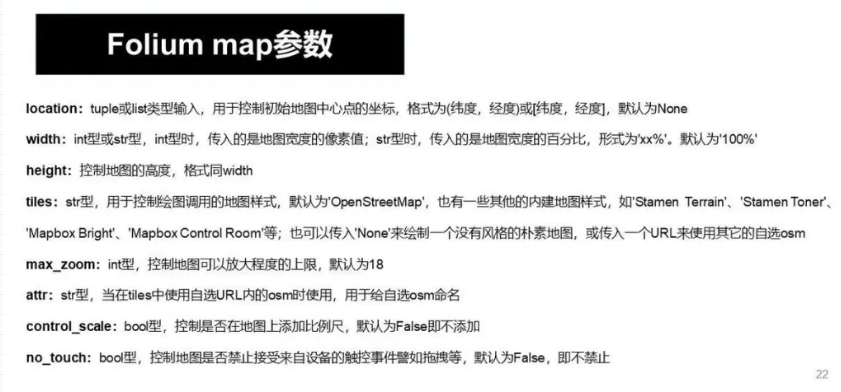

用Folium绘制热力图示例

In [2]:
import folium
import numpy as np
from folium.plugins import HeatMap
#先手动生成data数据，该数据格式由[纬度，经度，数值]构成
data=(np.random.normal(size=(100,3))*np.array([[1,1,1]])+np.array([[48,5,1]])).tolist()
# data

In [3]:
m=folium.Map([48,5],tiles='stamentoner',zoom_start=6)
HeatMap(data).add_to(m)
m 

folium的其他使用可以参考知乎的这篇文章，较为全面。  
https://www.zhihu.com/question/33783546

# Kepler.gl

Kepler.gl与folium类似，也是是一个图形化的数据可视化工具，基于Uber的大数据可视化开源项目deck.gl创建的demo app。目前支持3种数据格式：CSV、JSON、GeoJSON。

Kepler.gl[官网](https://kepler.gl/)提供了可视化图形案例，分别是Arc（弧）、Line（线）、Hexagon（六边形）、Point（点）、Heatmap（等高线图）、GeoJSON、Buildings（建筑）。

In [1]:
import pandas as pd 
import geopandas as gpd
from pyproj import Proj 
from keplergl import KeplerGl
from tqdm import tqdm
import os 
import matplotlib.pyplot as plt
import shapely
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimSun']    # 指定默认字体为新宋体。
plt.rcParams['axes.unicode_minus'] = False      # 解决保存图像时 负号'-' 显示为方块和报错的问题。

In [2]:
#获取文件夹中的数据
def get_data(file_path,model):
    assert model in ['train', 'test'], '{} Not Support this type of file'.format(model)
    paths = os.listdir(file_path)
#     print(len(paths))
    tmp = []
    for t in tqdm(range(len(paths))):
        p = paths[t]
        with open('{}/{}'.format(file_path, p), encoding='utf-8') as f:
            next(f)
            for line in f.readlines():
                tmp.append(line.strip().split(','))
    tmp_df = pd.DataFrame(tmp)
    if model == 'train':
        tmp_df.columns = ['ID', 'lat', 'lon', 'speed', 'direction', 'time', 'type']
    else:
        tmp_df['type'] = 'unknown'
        tmp_df.columns = ['ID', 'lat', 'lon', 'speed', 'direction', 'time', 'type']
    tmp_df['lat'] = tmp_df['lat'].astype(float)
    tmp_df['lon'] = tmp_df['lon'].astype(float)
    tmp_df['speed'] = tmp_df['speed'].astype(float)
    tmp_df['direction'] = tmp_df['direction'].astype(int)
    return tmp_df
# 平面坐标转经纬度，供初赛数据使用
# 选择标准为NAD83 / California zone 6 (ftUS) (EPSG:2230)，查询链接：https://mygeodata.cloud/cs2cs/
def transform_xy2lonlat(df):
    x = df['lat'].values
    y = df['lon'].values
    p=Proj('+proj=lcc +lat_1=33.88333333333333 +lat_2=32.78333333333333 +lat_0=32.16666666666666 +lon_0=-116.25 +x_0=2000000.0001016 +y_0=500000.0001016001 +datum=NAD83 +units=us-ft +no_defs ')
    df['lon'], df['lat'] = p(y, x, inverse=True)
    return df  
#修改数据的时间格式
def reformat_strtime(time_str=None, START_YEAR="2019"):
    """Reformat the strtime with the form '08 14' to 'START_YEAR-08-14' """
    time_str_split = time_str.split(" ")
    time_str_reformat = START_YEAR + "-" + time_str_split[0][:2] + "-" + time_str_split[0][2:4]
    time_str_reformat = time_str_reformat + " " + time_str_split[1]
    return time_str_reformat

In [3]:
df=get_data(r'D:\WORK_DATA_F\jupyter_notebook\2020数字中国创新大赛-智慧海洋建设\数据集\hy_round1_train_20200102','train')

100%|█████████████████████████████████████████████████████████████████████████████| 7000/7000 [00:11<00:00, 621.22it/s]


In [4]:
df=transform_xy2lonlat(df)

由以上可知，由于数据量过大，所以程序运行时会出现卡顿，或者无法运行的情况，此时可尝试利用geopandas对数据利用douglas-peucker算法进行简化。有效简化后的矢量数据可以在不损失太多视觉感知到的准确度的同时，带来巨大的性能提升。

化简前数据长度：394
化简后数据长度：156


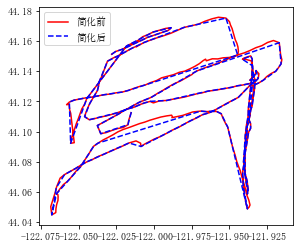

In [5]:
#douglas-peucker案例，由该案例可以看出针对相同ID的轨迹，可以先用geopandas将其进行简化和数据压缩
line= shapely.geometry.LineString(np.array(df[df['ID']=='6'][['lon','lat']]))
ax=gpd.GeoSeries([line]).plot(color='red')
ax = gpd.GeoSeries([line]).simplify(tolerance=0.005).plot(color='blue', 
                                                        ax=ax,
                                                        linestyle='--')
LegendElement = [plt.Line2D([], [], color='red', label='简化前'),
                 plt.Line2D([], [], color='blue', linestyle='--', label='简化后')]

# 将制作好的图例映射对象列表导入legend()中，并配置相关参数
ax.legend(handles = LegendElement, 
          loc='upper left', 
          fontsize=10)
# ax.set_ylim((-2.5, 1))
# ax.axis('off')
print('化简前数据长度：'+str(len(np.array(gpd.GeoSeries([line])[0]))))
print('化简后数据长度：'+str(len(np.array(gpd.GeoSeries([line]).simplify(tolerance=0.01)[0]))))

In [5]:
#定义数据简化函数。即通过shapely库将经纬度转换成LineString格式
#然后放入GeoSeries数据结构中并进行简化，最后再将所有数据放入GeoDataFrame中
def simplify_dataframe(df):
    line_list=[]
    for i in tqdm(dict(list(df.groupby('ID')))):
        line_dict={}
        lat_lon=dict(list(df.groupby('ID')))[i][['lon','lat']]
        line=shapely.geometry.LineString(np.array(lat_lon))
        line_dict['ID']=dict(list(df.groupby('ID')))[i].iloc[0]['ID']
        line_dict['type']=dict(list(df.groupby('ID')))[i].iloc[0]['type']
        line_dict['geometry']=gpd.GeoSeries([line]).simplify(tolerance=0.005)[0]
        line_list.append(line_dict)
    return gpd.GeoDataFrame(line_list)

In [6]:
df_gpd=simplify_dataframe(df)

  0%|                                                                                         | 0/7000 [00:01<?, ?it/s]


MemoryError: Unable to allocate 61.8 MiB for an array with shape (3, 2699638) and data type object

In [479]:
map1=KeplerGl(height=800)#zoom_start与这个height类似，表示地图的缩放程度
map1.add_data(data=df_gpd,name='data')
#当运行该代码后，下面会有一个使用说明的链接，可以根据该链接进行学习参考

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [489]:
map1

KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [{'dataId': ['data'], 'id': '8hbsad5qp', …

算完之后将数据重新化为dataframe格式，然后重新放到kepler.gl。然后去计算geohash

另外，kepler.gl最近新增「增量时间窗口」功能功能对时间序列数据的可视化提供了很好的帮助。当我们的数据集带有时间类型字段时，在添加对应的Filters之后，显示出的时间窗口如下图所示

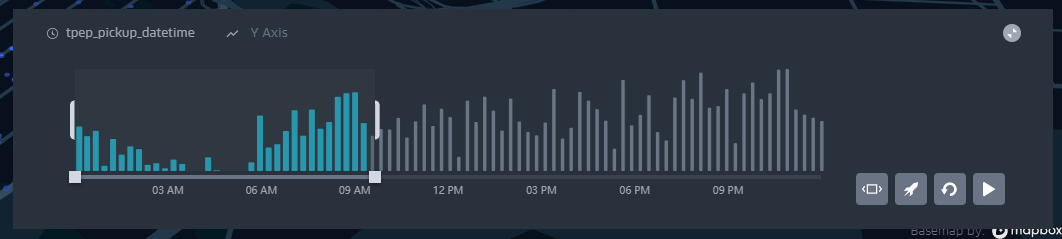

然后此时可以点击播放按钮，然后将默认的「Moving Time Window」模式切换到「Incremental Time Window」模式，此时就可以使用增量时间窗口模式看到画面中的数据会从起点开始持续叠加：

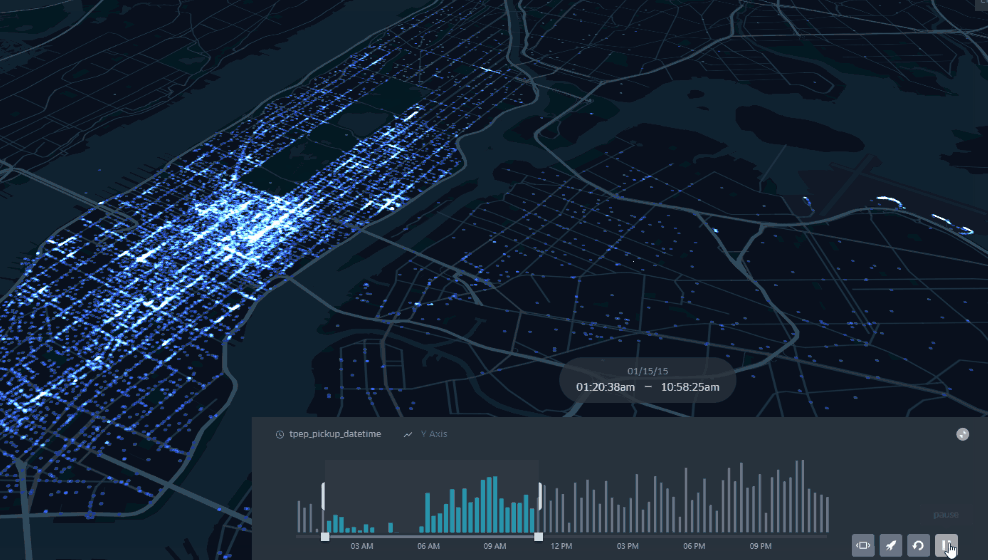

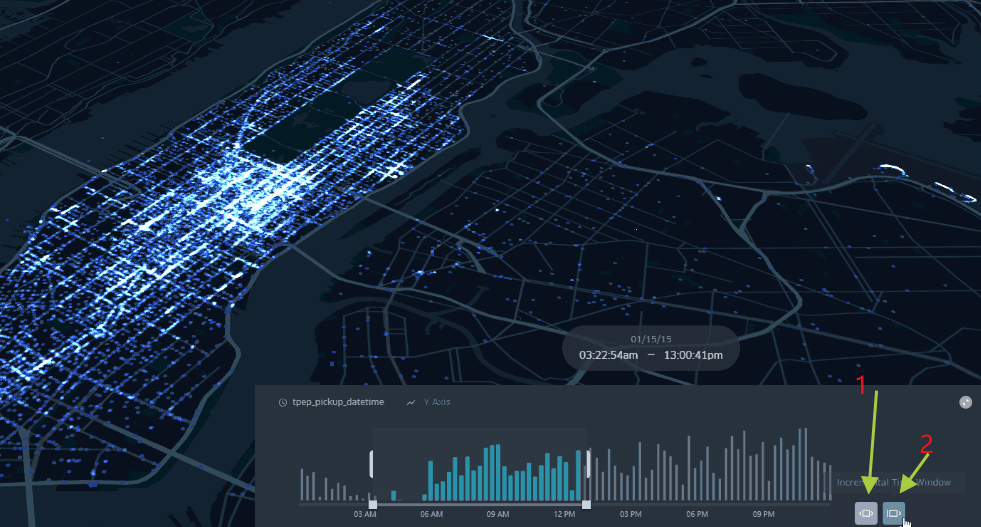

如果你对`dash`有所了解，那么纯Python快速开发出一个嵌入`kepler.gl`的交互式web应用将会变得非常容易。具体内容可参考该[链接](https://mp.weixin.qq.com/s?src=11&timestamp=1615604752&ver=2943&signature=Jndj*UGc62Y-f3zUofB0*lCRKnA*A4GfR7*XOYHV9XqzLm5wEGiew9MUDpQKyHvVe8ClPlsG6ffPjkmDD*X4ELAjJLbSXC76LhY7I3bhd41edWfmh-czc3*lwhwoyBMR&new=1)

# GeoHash

参考文献：https://blog.csdn.net/zhufenghao/article/details/85568340

在对于经纬度进行数据分析和特征提取时常用到的是GeoHash编码，该编码方式可以将地理经纬度坐标编码为由字母和数字所构成的短字符串，它具有如下特性：  
1. 层级空间数据结构，将地理位置用矩形网格划分，同一网格内地理编码相同
2. 只要编码长度足够长，可以表示任意精度的地理位置坐标
3. 编码前缀匹配的越长，地理位置越邻近。

下图对北京中关村软件园附近进行6位的GeoHash编码结果，9个网格相互邻近且具有相同的前缀.

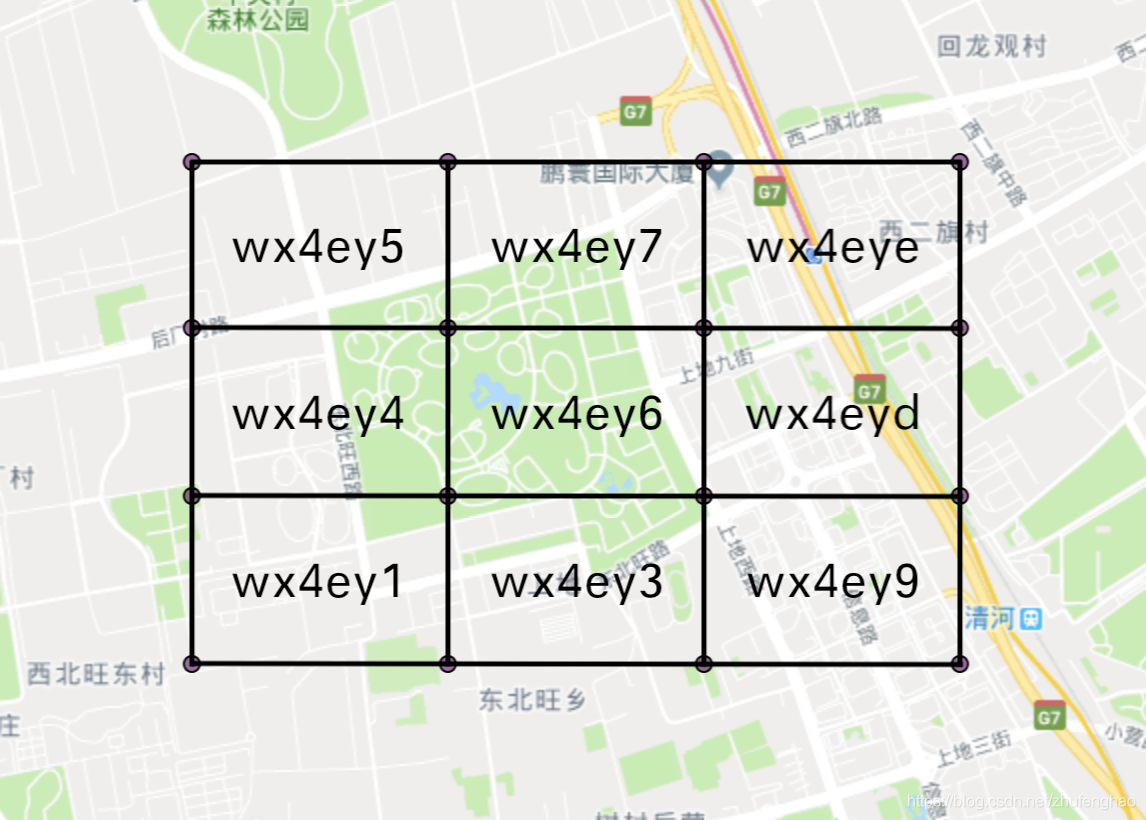

那么GeoHash算法是怎么对经纬度坐标进行编码的呢？总的来说，它采用的是二分法不断缩小经度和纬度的区间来进行二进制编码，最后将经纬度分别产生的编码奇偶位交叉合并，再用字母数字表示。举例来说，对于一个坐标116.29513,40.04920的经度执行算法：

1. 将地球经度区间[-180,180]二分为[-180,0]和[0,180]，116.29513在右区间，记1；
1. 将[0,180]二分为[0,90]和[90,180]，116.29513在右区间，记1；
1. 将[90,180]二分为[90,135]和[135,180]，116.29513在左区间，记0；
1. 递归上述过程（左区间记0，右区间记1）直到所需要的精度，得到一串二进制编码11010 01010 11001。


同理将地球纬度区间[-90,90]根据纬度40.04920进行递归二分得到二进制编码10111 00011 11010，接着生成新的二进制数，它的偶数位放经度，奇数位放纬度，得到11100 11101 00100 01101 11110 00110，最后使用32个数字和字母（字母去掉a、i、l、o这4个）进行32进制编码，即先将二进制数每5位转化为十进制28 29 4 13 30 6，然后对应着编码表进行映射得到wy4ey6。


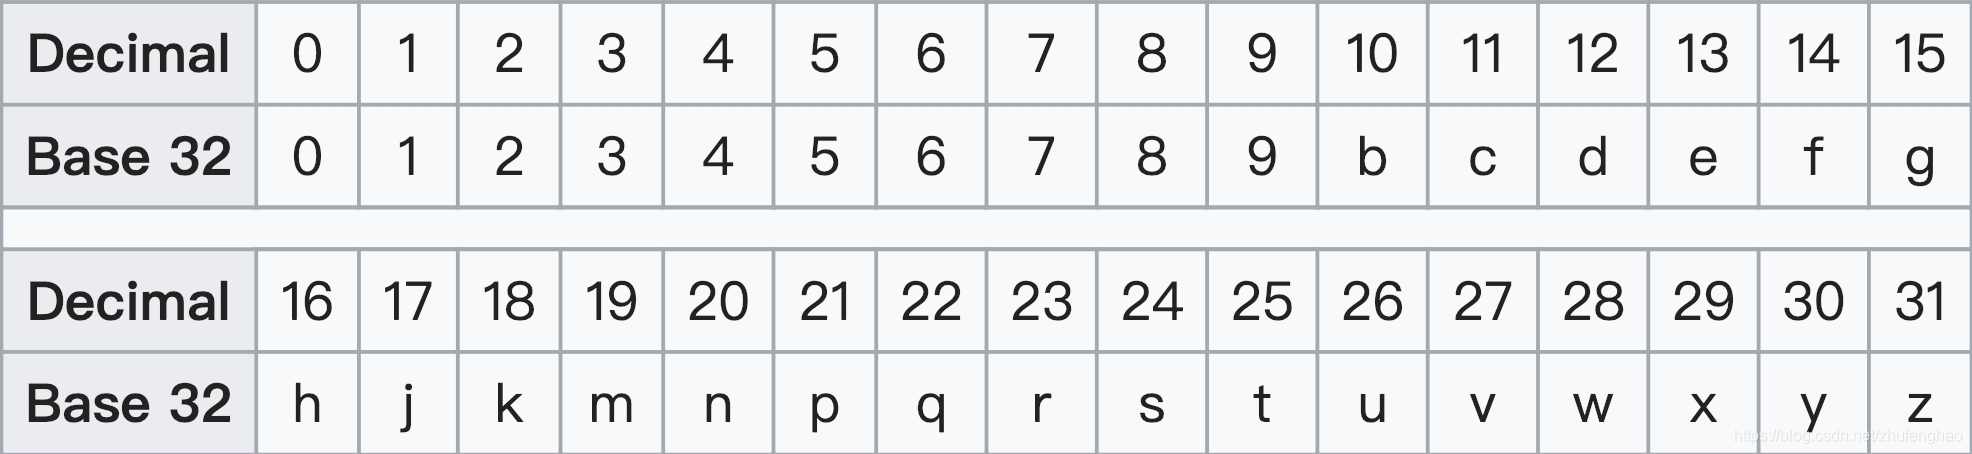

对这样的GeoHash编码大小排序后，是按照Z形曲线来填充空间的，后来又衍生出多种填充曲线且具有多种特性，由于没有Z形曲线简单通用，这里就不赘述了。

另外还有一些其他曲线可以填充空间，比如著名的希尔伯特曲线，感兴趣的可以看bilibili这个视频，了解一下，还是蛮有趣的~  


https://www.bilibili.com/video/BV1Sf4y147J9?from=search&seid=12367619856156226126

## 注意事项

GeoHash的主要价值在于将二维的经纬度坐标信息编码到了一维的字符串中，在做地理位置索引时只需要匹配字符串即可，便于缓存、信息压缩。在使用大数据工具（例如Spark）进行数据挖掘聚类时，GeoHash显得更加便捷和高效。

但是使用GeoHash还有一些注意事项：

1. 由于GeoHash使用Z形曲线来顺序填充空间的，而Z形曲线在拐角处会有突变，这表现在有些相邻的网格的编码前缀比其他网格相差较多，因此利用前缀匹配可以找到一部分邻近的区域，但同时也会漏掉一些。
1. 一个网格内部所有点会共用一个GeoHash值，在网格的边缘点会匹配到可能较远但是GeoHash值相同的点，而本来距离较近的点却没有匹配到。这种问题可以这样解决：适当增加GeoHash编码长度，并使用周围的8个近邻编码来参与，因为往往只使用一个GeoHash编码可能会有严重风险！
